<a href="https://colab.research.google.com/github/csabiu/KAML-2025/blob/main/KAML_catalogues_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Supervised Regression problem

In this notebook we will use neural network algorihtms to learn a mapping between galaxy magnitudes and colors and the spectroscopic redshift.



# Load some libraries

In [ ]:
!pip install astroquery

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from sklearn.model_selection import train_test_split

# Doanload the dataset

In [2]:
from astroquery.sdss import SDSS

# look for availabe tables and columns in
# http://skyserver.sdss.org/dr12/en/help/browser/browser.aspx

query = " SELECT TOP 200000 objID, ra ,dec, z, zerr, class, \
        cModelMag_r as mag_r, cModelMag_g as mag_g, cModelMag_i as mag_i, \
        cModelMag_u as mag_u, cModelMag_z as mag_z \
        FROM  SpecPhotoAll  WHERE (class = 'GALAXY') \
        AND z>0.1 AND z<1. AND ra>200 AND ra<230 AND dec>10 AND dec<40"


d = SDSS.query_sql(query)

If the above query fails try the following...

In [3]:
#import pandas as pd
#d = pd.read_csv("https://archive.kasi.re.kr/bigdata/temp/KAML_catalogues_regression.csv ", header=0)


# Clean the data

In [4]:
#you can look at the all the features available to you
# http://skyserver.sdss.org/dr14/en/help/browser/browser.aspx#&&history=description+PhotoObj+V

print (d.keys())

['objID', 'ra', 'dec', 'z', 'zerr', 'class', 'mag_r', 'mag_g', 'mag_i', 'mag_u', 'mag_z']


# for photo-z work
# The target/label values are spectroscopic redshifts

In [5]:
# we will use just dereddend magnitudes
mags = ['mag_g', 'mag_r', 'mag_i','mag_z','mag_u']
d=d[d[mags[0]]==d[mags[0]]]
d=d[d[mags[1]]==d[mags[1]]]
d=d[d[mags[2]]==d[mags[2]]]
d=d[d[mags[3]]==d[mags[3]]]
d=d[d[mags[4]]==d[mags[4]]]

def f(x):
    return float(x)
f2 = np.vectorize(f)

#and color combinations created from them.
cols= []
for i in range(len(mags)-1):
    for j in range(i, len(mags)):
        cols.append(mags[i]+'-' + mags[j])

# let's load these into an input array
inputs = np.zeros((len(d), len(mags+cols)), dtype=float)
for i, key in enumerate(mags):
    inputs[:, i] = np.array(d[key])

cnt = len(mags)
for i in range(len(mags)-1):
    for j in range(i, len(mags)):
        inputs[:, cnt] = np.array(f2(d[mags[i]])) - np.array(f2(d[mags[j]]))
        cnt += 1


In [7]:
targets = np.array(f2(d['z']))

# we will split the data into a trainind and testing sample.


In [8]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.4, random_state=42)

print("Training inputs: ",x_train.shape)
print("Training outputs: ",y_train.shape)
print("Testing inputs: ",x_test.shape)
print("Testing outputs: ",y_test.shape)

Training inputs:  (98968, 19)
Training outputs:  (98968,)
Testing inputs:  (65979, 19)
Testing outputs:  (65979,)


# Import Tensorflow

In [9]:
import tensorflow as tf

2025-05-13 15:07:06.763205: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:

model.build()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
hist=model.fit(x_train,y_train,validation_split=0.2,epochs=10,batch_size=128,shuffle=True)

Epoch 1/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0209 - val_loss: 0.0104
Epoch 2/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0096 - val_loss: 0.0090
Epoch 3/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0091 - val_loss: 0.0097
Epoch 4/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0085 - val_loss: 0.0116
Epoch 5/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0086 - val_loss: 0.0080
Epoch 6/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 7/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 8/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 9/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0080 - val_loss: 0.0076
Epoch 10/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0080 - val_loss: 0.0077


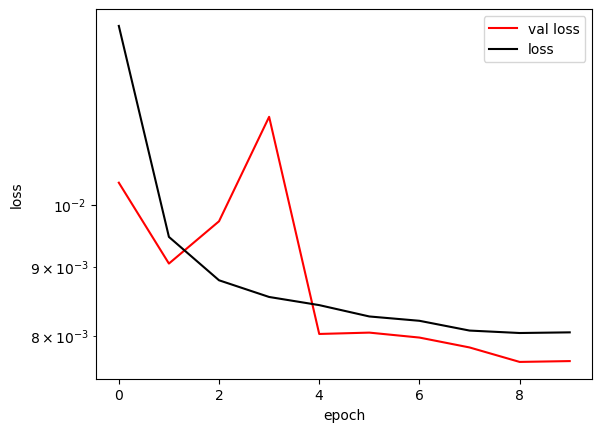

In [16]:
plt.plot(hist.history['val_loss'],'r-',label='val loss')
plt.plot(hist.history['loss'],'k-',label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend()
plt.show()

Is the model still learning? Are both the loss and val_loss decreasing? When should we stop training?

In [17]:
# let's add a stopping criteria
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model = get_compiled_model()
hist=model.fit(x_train,y_train,validation_split=0.2,epochs=100,batch_size=128,shuffle=True,callbacks=[callback])

Epoch 1/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1217 - val_loss: 0.0117
Epoch 2/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0108 - val_loss: 0.0100
Epoch 3/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0094 - val_loss: 0.0089
Epoch 4/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 5/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 6/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 7/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0084 - val_loss: 0.0078
Epoch 8/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 9/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0082 - val_loss: 0.0077
Epoch 10/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0081 - val_loss: 0.0077
Epoch 11/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0081 - val_loss: 0.0076
Epoch 12/100
619/619 ━━━━━━━━━━━━━━━━━━━━

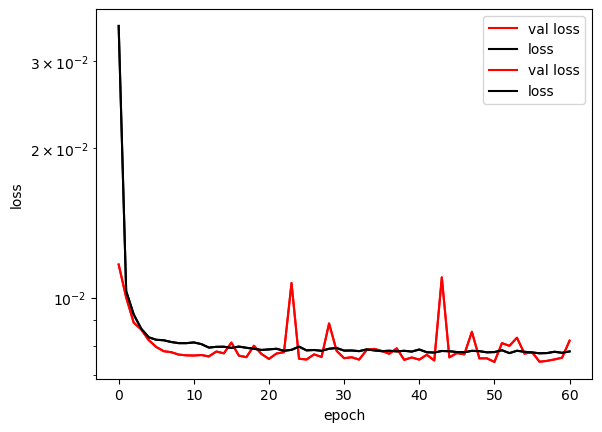

In [19]:
plt.plot(hist.history['val_loss'],'r-',label='val loss')
plt.plot(hist.history['loss'],'k-',label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend()
plt.show()

2062/2062 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step


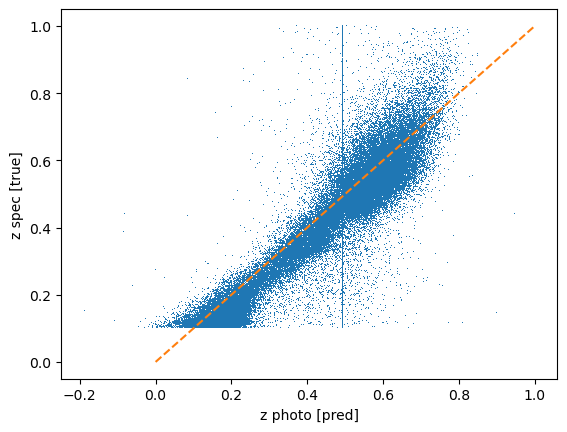

In [20]:
pred=model.predict(x_test).squeeze()

plt.plot(pred,y_test,',')
plt.plot([0, 1],[0, 1],'--')
plt.ylabel('z spec [true]')
plt.xlabel('z photo [pred]')
plt.show()

dispersion:  0.05187744


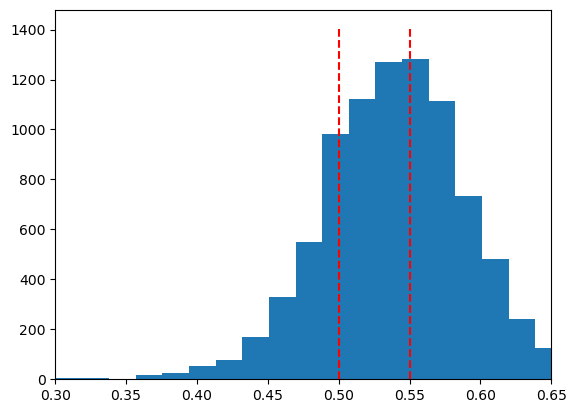

In [24]:
specz=[0.5,0.55]
a=plt.hist(pred[(y_test>specz[0]) & (y_test<specz[1])],30)
plt.plot([specz[0],specz[0]],[0,1.1*np.max(a[0])],'r--')
plt.plot([specz[1],specz[1]],[0,1.1*np.max(a[0])],'r--')
plt.xlim((0.3,0.65))

print('dispersion: ',np.std(pred[(y_test>specz[0]) & (y_test<specz[1])]))
plt.show()

Sometimes the best model (lowest val_loss) is not the last epoch. So lets restore the weights of the model with the lowest val_loss.

In [22]:
# let's save and restore the best model
call_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.weights.h5',
                                              save_weights_only=True,
                                              monitor='val_loss',
                                              mode='min',
                                              save_best_only=True)

model = get_compiled_model()
hist=model.fit(x_train,y_train,validation_split=0.2,epochs=100,batch_size=128,shuffle=True,callbacks=[callback, call_save])

Epoch 1/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0238 - val_loss: 0.0104
Epoch 2/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 3/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0090 - val_loss: 0.0083
Epoch 4/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0085 - val_loss: 0.0080
Epoch 5/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0083 - val_loss: 0.0087
Epoch 6/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0082 - val_loss: 0.0078
Epoch 7/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 8/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 9/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 10/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0083 - val_loss: 0.0078
Epoch 11/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 12/100
619/619 ━━━━━━━━━━━━━━━━━━━━

2062/2062 ━━━━━━━━━━━━━━━━━━━━ 2s 847us/step


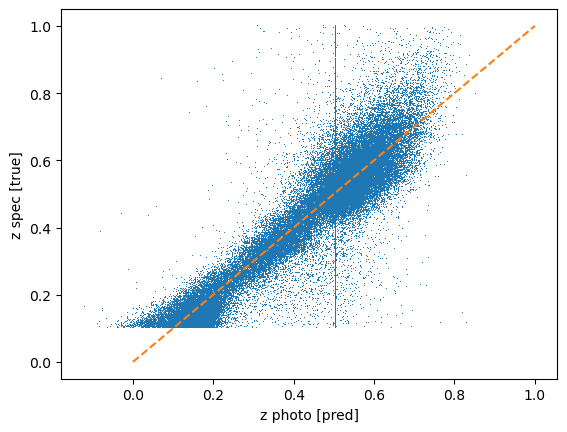

In [25]:
# now restore the best model before prediction
model.load_weights('best_model.weights.h5')

pred=model.predict(x_test).squeeze()

plt.plot(pred,y_test,',')
plt.plot([0, 1],[0, 1],'--')
plt.ylabel('z spec [true]')
plt.xlabel('z photo [pred]')
plt.show()


# Assignment 3:


*   Try different activation functions and learning rates
*   What is the best val_loss you can get
*   What is the lowest dispersion on for 0.5< spec z < 0.55



In [26]:
def get_compiled_model(activation='sigmoid', learning_rate=0.001):
  model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(19,)),
      tf.keras.layers.Dense(64, activation=activation),
      tf.keras.layers.Dense(1) # number of outputs
  # we are predicting one value, the redshift
  # so we have one output neuron
  # if we were predicting two values, we would have two output neurons
  # and so on
  # if we were predicting a classification problem, we would use softmax
  # and have as many neurons as classes
  # and use categorical_crossentropy as loss function
  # if we were predicting a regression problem, we would use linear
  # and have as many neurons as outputs
  # and use mean_squared_error as loss function
  # if we were predicting a binary classification problem, we would use sigmoid
  # and have one output neuron
  # and use binary_crossentropy as loss function
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate)) # how much the weights are updated
  # during training
  # the learning rate is the step size at each iteration while moving
  # toward a minimum of the loss function
  # the lower the learning rate, the smaller the step size
  return model

activations=  ['relu', 'sigmoid', 'tanh']
learning_rates = [0.01, 0.001, 0.0001]

best_val_loss = float('inf')
best_params = {}

for activation in activations:
    for lr in learning_rates:
        print(f"Training with activation={activation}, learning_rate={lr}")
        model = get_compiled_model(activation=activation, learning_rate=lr)
        hist = model.fit(x_train, y_train, validation_split=0.2, epochs=10, 
                         batch_size=128, shuffle=True, callbacks=[callback, call_save])
        
        val_loss = min(hist.history['val_loss'])
        print(f"Validation loss: {val_loss}")
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_params = {'activation': activation, 'learning_rate': lr,
                            'dispersion: ': np.std(pred[(y_test>specz[0]) & (y_test<specz[1])])}

print(f"Best parameters: {best_params} with validation loss: {best_val_loss} and dispersion: {best_params['dispersion: ']}")


Training with activation=relu, learning_rate=0.01
Epoch 1/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6832 - val_loss: 0.0145
Epoch 2/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0141 - val_loss: 0.0119
Epoch 3/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0131 - val_loss: 0.0107
Epoch 4/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0132 - val_loss: 0.0097
Epoch 5/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0203 - val_loss: 0.0124
Epoch 6/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0166 - val_loss: 0.0092
Epoch 7/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0145 - val_loss: 0.0142
Epoch 8/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0142 - val_loss: 0.0101
Epoch 9/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0128 - val_loss: 0.0127
Epoch 10/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0109 - val_loss: 0.0515
Validation loss: 0.009213060140609741
Training with activation=relu, learning_rate=0.001
